---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 5

---

Please write your full name here
- **Name** : "Alaa Yasser Mahmoud"

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Question 0
Set random seed to 47

In [ ]:
random_seed = np.random.seed(47)

# Question 1
Scatter plot the dataset

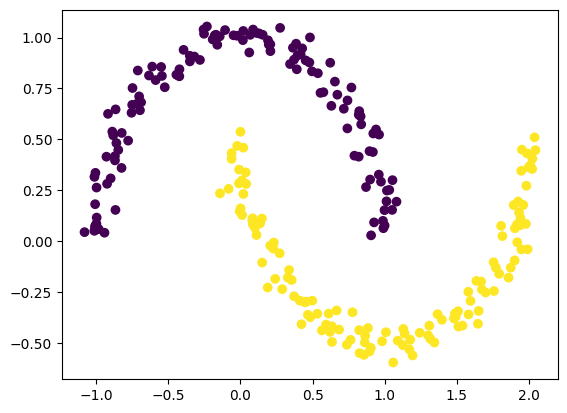

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

ANSWER:
</br>
`K-Means may not perform very well on this dataset because it consists of two non-spherical and non-uniformly dense clusters that are not clearly separable, and K-Means works best when clusters are well separated and have relatively spherical shapes.`

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER:
<br/>
`there is a clear elbow at k=2, so k=2 is a good choice for the number of clusters.`
<br/>
`When we trained a KMeans model with k=2 and plotted the data after clustering,the two clusters were roughly separated. However, since the clusters have non-spherical shapes, KMeans might not capture the full complexity of the clusters.`

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

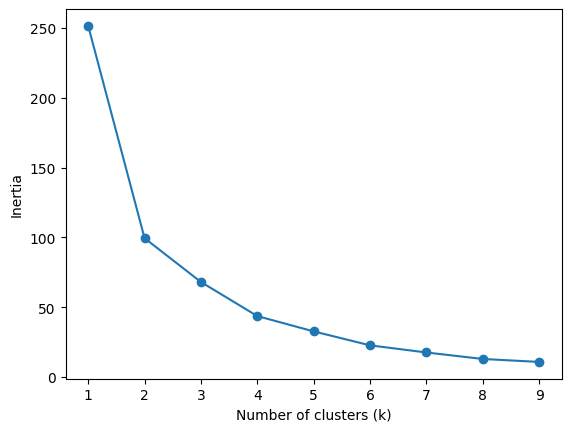

In [ ]:
# Perform Elbow method to find best k
inertias = []
ks = range(1, 10)
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot the elbow graph
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


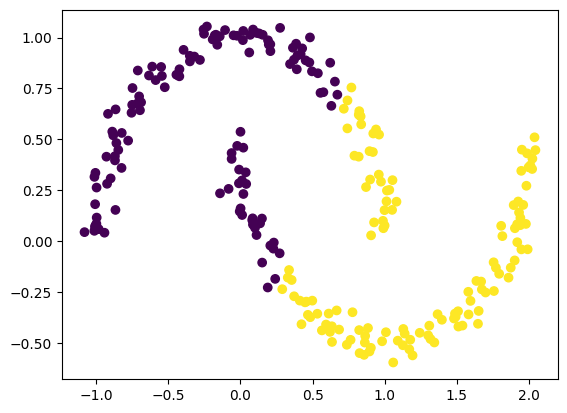

In [ ]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis')
plt.show()


- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

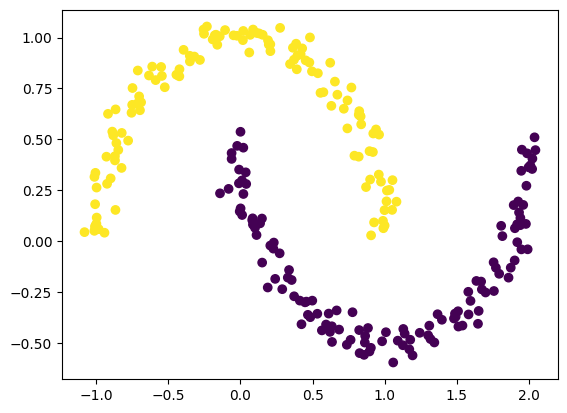

In [ ]:
from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN(eps=0.3)

DBSCAN_model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=DBSCAN_model.labels_, cmap='viridis')
plt.show()

**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER:
<br/>
`DBSCAN is better than KMeans at identifying clusters with arbitrary shapes and does not require the user to specify the number of clusters in advance. KMeans works best when clusters are well separated and have a spherical shape, and the number of clusters is known in advance.`

# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?

ANSWER:
<br/>
`KMeans fails with this data because of the cluster having a stretched shape along one dimension(non-spherical manner). KMeans assumes that clusters are spherical and works by minimizing the sum of squared distances between each point and its assigned cluster center.So KMeans misassigns points to the other cluster.`

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_aniso)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


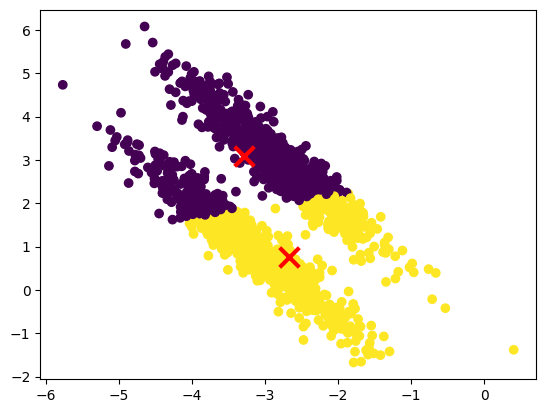

In [ ]:
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [ ]:
def kmeans(n_clusters, dataset):

    centers = dataset[np.random.choice(dataset.shape[0], size=n_clusters, replace=False), :]

    old_centers = np.zeros(centers.shape)
    cluster_assignments = np.zeros(dataset.shape[0])
    distances = np.zeros((dataset.shape[0], n_clusters))

    # Iterating until convergence
    while np.linalg.norm(centers - old_centers) != 0:
        # Assigning each point to the nearest cluster center
        for i in range(n_clusters):
            distances[:, i] = np.linalg.norm(dataset - centers[i], axis=1)
        cluster_assignments = np.argmin(distances, axis=1)

        # Updating cluster centers
        old_centers = np.copy(centers)
        for i in range(n_clusters):
            centers[i] = np.mean(dataset[cluster_assignments == i], axis=0)

    return centers


# Question 6
For the following dataset:

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


- Scatter plot the data **without** coloring the points using labels.
- How many clusters do you see?

ANSWER:
<br/>
`it looks like there are four distinct clusters in the data.(this may be overfitting as this visual inspection may not be enough to determine the exact number of clusters)`

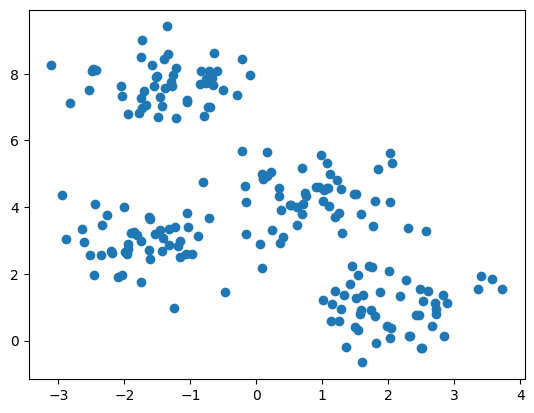

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers:
 [[-1.36512238  7.70188306]
 [-1.70639178  2.9104771 ]
 [ 2.07464749  0.9869902 ]
 [ 0.86008475  4.31501411]]


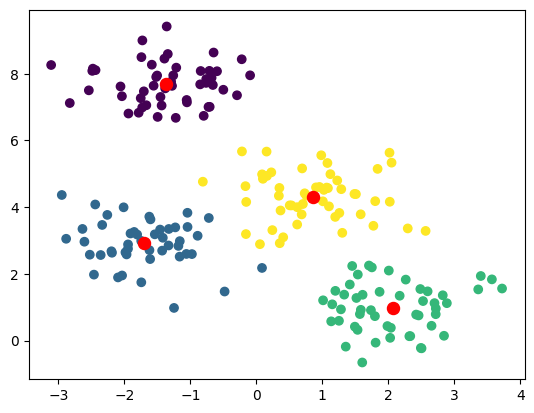

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_
print("Cluster centers:\n", centers)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='.', s=300, color='r')
plt.show()

- Calculate the accuracy score between kmeans prediction and the true blobs labels

In [ ]:
from sklearn.metrics import accuracy_score
pred_labels = kmeans.predict(X)
accuracy = accuracy_score(y, pred_labels)
print(f"Accuracy score: {accuracy*100}%")

Accuracy score: 25.0%


- Why is the accuracy so low?

ANSWER:
<br/>
`Because the labels assigned by KMeans may not necessarily match the true labels of the blobs, since KMeans is an unsupervised clustering algorithm and does not use the true labels during training.`

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [ ]:
import statistics as s
def relabel(n_clusters, true_labels, pred_labels):
    new_labels =[]
    for i in range(n_clusters):
        cluster_true_labels=true_labels[pred_labels==i]
        mode=s.mode(cluster_true_labels)
        new_labels.append(mode)

    return new_labels


In [ ]:
n_clusters=4
kmeans_model = KMeans(n_clusters=n_clusters)

kmeans_model.fit(X)
cluster_centers = kmeans_model.cluster_centers_

true_labels = y
pred_labels = kmeans_model.predict(X)

new_labels = relabel(4, y,pred_labels)
# print(new_labels)
for i in range(len(pred_labels)):
    pred_labels[i]=new_labels[pred_labels[i]]
assert len(set(new_labels)) == n_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy score: {accuracy*100} %")

Accuracy score: 99.0 %


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [ ]:
def k_medoids_clustering(n_clusters, dataset):
    n_samples = dataset.shape[0]

    initial_centers = np.random.choice(n_samples, n_clusters, replace=False)
    cluster_centers = dataset[initial_centers]

    while True:
        # Assigning each data point to the closest cluster center
        distances = np.sqrt(((dataset - cluster_centers[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Updating the cluster centers to be the medoids
        new_centers = np.zeros_like(cluster_centers)
        for i in range(n_clusters):
            mask = (labels == i)
            cluster_points = dataset[mask]
            distances = np.sqrt(((cluster_points - cluster_points[:, np.newaxis])**2).sum(axis=2))
            medoid_index = np.argmin(distances.sum(axis=1))
            new_centers[i] = cluster_points[medoid_index]

        # Checking for convergence
        if np.allclose(cluster_centers, new_centers):
            break
        else:
            cluster_centers = new_centers

    return cluster_centers



- Apply YOUR k-medoids clustering algorithm with 4 clusters
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

In [ ]:
import pandas as pd

df=pd.read_csv('./faithful.dat',delim_whitespace=True)

n_clusters = 4
dataset = df.to_numpy()
cluster_centers = k_medoids_clustering(n_clusters, dataset)

distances = np.sqrt(((dataset - cluster_centers[:, np.newaxis])**2).sum(axis=2))
labels = np.argmin(distances, axis=0)



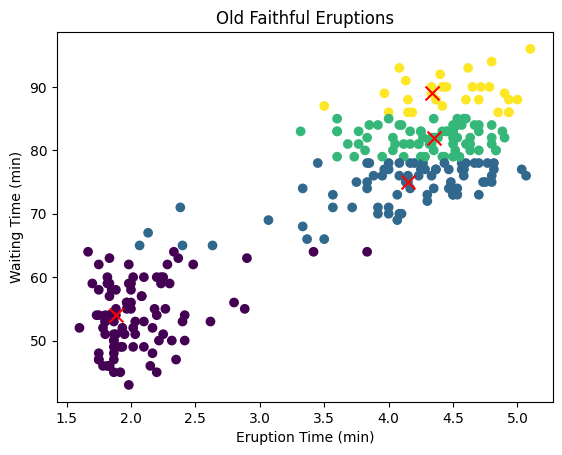

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, marker='x', color='red')
plt.title('Old Faithful Eruptions')
plt.xlabel('Eruption Time (min)')
plt.ylabel('Waiting Time (min)')
plt.show()